### Please do the following task

* A) x[n]={1, 2, 3, 4, 5, 6, 0, 0} & h[n]= {1, 2, 3, 4, 3, 2, 1, 0},   Check y[n]=x[n]*h[n] & y[n]=h[n]*x[n] .   
* B) Impulse response of DTS-10 & DTS-11. (at least 16 coeff.)   
* C) h[n]=DTS-10 & DTS-11, x[n]={1, 1, 1, 1, 1, 1, 0 ,0}, check y[n].   
* D) h[n]=DTS-10 & DTS-11, check the DTS solution for x[n]=u[n].   
* E) h[n]=DTS-10 & DTS-11, check the frequency response of DTS.   

In [1]:
import numpy as np
import pandas as pd
import math
from IPython.display import Image
from scipy import signal
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
import plotly.express as px


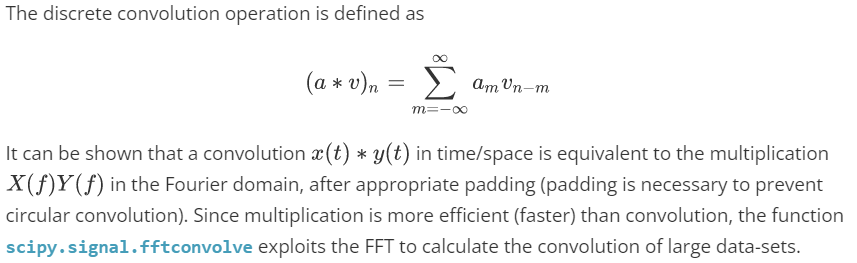

In [2]:
Image('./img/def_conv.png')

### A.)
 x[n]={1, 2, 3, 4, 5, 6, 0, 0} & h[n]= {1, 2, 3, 4, 3, 2, 1, 0},   Check y[n]=x[n]*h[n] & y[n]=h[n]*x[n] .

In [3]:
x,h = [1, 2, 3, 4, 5, 6, 0, 0],[1, 2, 3,4, 3, 2, 1, 0]
y1 = np.convolve(x,h)
y2 = np.convolve(h,x)
print("y[n]=x[n]*h[n] =",y1,"\n"
      "y[n]=h[n]*x[n] =",y2)

y[n]=x[n]*h[n] = [ 1  4 10 20 33 48 57 58 50 32 17  6  0  0  0] 
y[n]=h[n]*x[n] = [ 1  4 10 20 33 48 57 58 50 32 17  6  0  0  0]


In [4]:
fig = go.Figure()
N = 15
x_axis = np.linspace(0 , 15, N)

fig.add_traces(go.Scatter( 
                        x = x_axis, y = y1, mode='markers+lines', name= 'Conv y1'))
fig.add_traces(go.Scatter( 
                        x = x_axis, y = y2, mode='markers+lines', name= 'Conv y2'))
fig.update_layout(
        xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Iterate<br><sup>"
            )
        )
    )

### B.)
Impulse response of DTS-10 & DTS-11. (at least 16 coeff.)

* DTS-10  
y[n] - 0.6y[n-1] = x[n]  
y[n] - 1/6 * y[n-1] - 1/6 * y[n-2] = 4x[n]  
* DTS-11  
y[n] - y[n-1] - 2y[n-2] = 2x[n] - x[n-1]  


In [46]:
def simulate_system_B_DTS10_1(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        if n == 0:
            y[n] = x[n] 
        else:
            y[n] = x[n] + 0.6 * y[n-1]
    return y
def simulate_system_B_DTS10_2(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        if n == 0:
            y[n] = 4 * x[n]
        elif n == 1:
            y[n] = 4 * 1/6
        else:
            y[n] = 4 * x[n] + 1/6 * y[n-1] + 1/6 * y[n-2]
    return y
def simulate_system_B_DTS11(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        if n == 0:
            y[n] = 2 * x[n]
        elif n == 1:
            y[n] = x[n]
        else:
            y[n] = 2 * x[n] - x[n-1] + y[n-1] + 2 * y[n-2]
    return y


In [47]:
x = [(1 if i ==0 else 0) for i in range(16)]
y_DTS_10_1 = simulate_system_B_DTS10_1(x)
y_DTS_10_2 = simulate_system_B_DTS10_2(x)
y_DTS_11 = simulate_system_B_DTS11(x)

In [60]:
fig = go.Figure()
N = len(x)
x_axis = np.linspace(0, 15, N)
fig.add_traces(go.Scatter( 
                        x = x_axis, y = y_DTS_10_1, mode='markers+lines', name= 'Impulse response DTS_10_1'))
fig.add_traces(go.Scatter( 
                        x = x_axis, y = y_DTS_10_2, mode='markers+lines', name= 'Impulse response DTS_10_2'))
fig.add_traces(go.Scatter( 
                        x = x_axis, y = y_DTS_11, mode='markers+lines', name= 'Impulse response DTS_11'))

fig.update_layout(
        xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="<br><sup>"
            )
        )
    )

### C.)
h[n]=DTS-10 & DTS-11, x[n]={1, 1, 1, 1, 1, 1, 0 ,0}, check y[n]. 
1. h[n]=DTS-10's y[n]
2. h[n]=DTS-11's y[n]

* conv: *  
y[n] = sum( x[m] * h[n-m])

In [13]:
x_c = [ (1 if i<=5 else 0) for i in range(8)]
# DTS-10_1
y_DTS_10_1 = simulate_system_B_DTS10_1(x)
c_y_DTS_10_1 = np.convolve(x_c,y_DTS_10_1)
# DTS-10_2
y_DTS_10_2 = simulate_system_B_DTS10_2(x)
c_y_DTS_10_2 = np.convolve(x_c,y_DTS_10_2)
# DTS-11_1
y_DTS_11 = simulate_system_B_DTS11(x)
c_y_DTS_11 = np.convolve(x_c,y_DTS_11)

In [63]:
fig = go.Figure()
N = len(c_y_DTS_10_1)
x_axis = np.linspace(0 , 22,N)
fig.add_traces(go.Scatter( 
                        x = x_axis, y = c_y_DTS_10_1, mode='markers+lines', name= 'y_c_1'))
fig.add_traces(go.Scatter( 
                        x = x_axis, y = c_y_DTS_10_2, mode='markers+lines', name= 'y_c_2'))
fig.add_traces(go.Scatter( 
                        x = x_axis, y = c_y_DTS_11, mode='markers+lines', name= 'y_c_3'))

fig.update_layout(
        xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Iterate<br><sup>"
            )
        )
    )

### D.)
 h[n]=DTS-10 & DTS-11, check the DTS solution for x[n]=u[n].   

In [14]:
x = [(1 if i ==0 else 0) for i in range(16)]
x_d = [1 for i in range(len(x))]
# DTS-10_1
y_DTS_10_1 = simulate_system_B_DTS10_1(x)
d_y_DTS_10_1 = np.convolve(x_d,y_DTS_10_1)
# DTS-10_2
y_DTS_10_2 = simulate_system_B_DTS10_2(x)
d_y_DTS_10_2 = np.convolve(x_d,y_DTS_10_2)
# DTS-11_1
y_DTS_11 = simulate_system_B_DTS11(x)
d_y_DTS_11 = np.convolve(x_d,y_DTS_11)

In [27]:
print('y_d1 = ',d_y_DTS_10_1,'\n','\n'
      'y_d2 =',d_y_DTS_10_2,'\n','\n'
      'y_d3 =',d_y_DTS_11)

y_d1 =  [1.00000000e+00 1.60000000e+00 1.96000000e+00 2.17600000e+00
 2.30560000e+00 2.38336000e+00 2.43001600e+00 2.45800960e+00
 2.47480576e+00 2.48488346e+00 2.49093007e+00 2.49455804e+00
 2.49673483e+00 2.49804090e+00 2.49882454e+00 2.49929472e+00
 1.49929472e+00 8.99294723e-01 5.39294723e-01 3.23294723e-01
 1.93694723e-01 1.15934723e-01 6.92787225e-02 4.12851225e-02
 2.44889625e-02 1.44112665e-02 8.36464892e-03 4.73667836e-03
 2.55989603e-03 1.25382663e-03 4.70184985e-04] 
 
y_d2 = [4.00000000e+00 4.66666667e+00 5.44444444e+00 5.68518519e+00
 5.85493827e+00 5.92335391e+00 5.96304870e+00 5.98106710e+00
 5.99068597e+00 5.99529218e+00 5.99766302e+00 5.99882587e+00
 5.99941482e+00 5.99970678e+00 5.99985360e+00 5.99992673e+00
 1.99992673e+00 1.33326006e+00 5.55482285e-01 3.14741545e-01
 1.44988458e-01 7.65728205e-02 3.68780331e-02 1.88596289e-02
 9.24076362e-03 4.63455204e-03 2.26370590e-03 1.10086295e-03
 5.11914765e-04 2.19949576e-04 7.31306807e-05] 
 
y_d3 = [2.0000e+00 2.0000e+00 6

In [69]:
fig = go.Figure()
N = len(d_y_DTS_10_1)
x_axis = np.linspace(0 , 30,N)
fig.add_traces(go.Scatter( 
                        x = x_axis, y = d_y_DTS_10_1, mode='markers+lines', name= 'y_d_1'))
fig.add_traces(go.Scatter( 
                        x = x_axis, y = d_y_DTS_10_2, mode='markers+lines', name= 'y_d_2'))
fig.add_traces(go.Scatter( 
                        x = x_axis, y = d_y_DTS_11, mode='markers+lines', name= 'y_d_3'))

fig.update_layout(
        xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Iterate<br><sup>"
            )
        )
)

### E.)
h[n]=DTS-10 & DTS-11, check the frequency response of DTS.

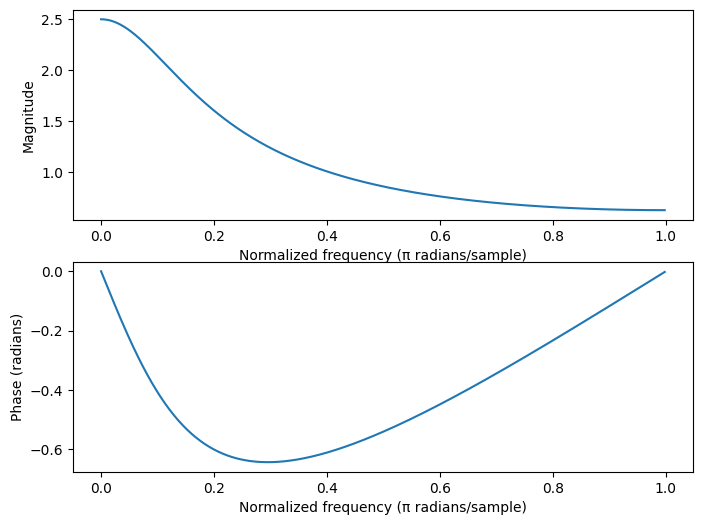

In [28]:
import matplotlib.pyplot as plt
from scipy.signal import freqz

# y[n] - 0.6y[n-1] = x[n]
# H(z) = Y(z)/X(z) = 1 / (1 - 0.6z^-1)
# Y(z) and X(z) are the z-transforms of the output y[n] and input x[n]
# define the transfer function coefficients
b = [1]
a = [1, -0.6]

# compute the frequency response
w, h = freqz(b, a)

# plot the magnitude and phase responses
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(w/np.pi, np.abs(h))
ax[0].set_xlabel('Normalized frequency (π radians/sample)')
ax[0].set_ylabel('Magnitude')
ax[1].plot(w/np.pi, np.angle(h))
ax[1].set_xlabel('Normalized frequency (π radians/sample)')
ax[1].set_ylabel('Phase (radians)')
plt.show()


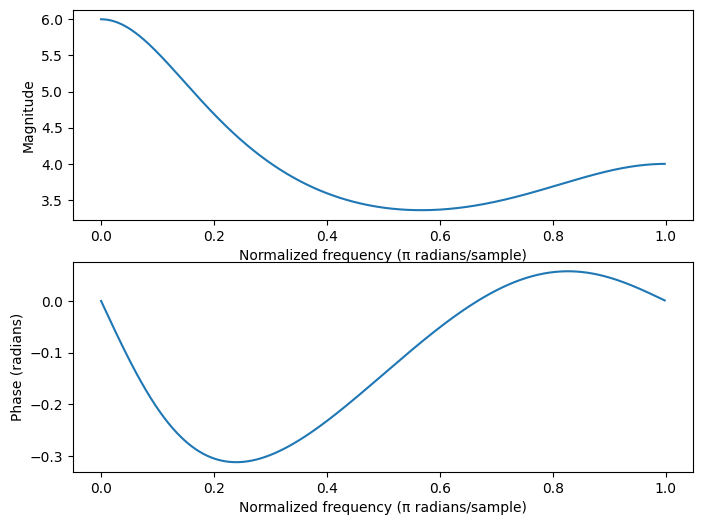

In [35]:
# y[n] - 1/6 * y[n-1] - 1/6 * y[n-2] = 4x[n]
# H(z) = Y(z) / X(z) = 4 / (1 - 1/6 z^-1 - 1/6 z^-2)
# Y(z) and X(z) are the z-transforms of the output y[n] and input x[n]

# define the transfer function coefficients
b = [4]
a = [1, -1/6, -1/6]

# compute the frequency response
w, h = freqz(b, a)

# plot the magnitude and phase responses
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(w/np.pi, np.abs(h))
ax[0].set_xlabel('Normalized frequency (π radians/sample)')
ax[0].set_ylabel('Magnitude')
ax[1].plot(w/np.pi, np.angle(h))
ax[1].set_xlabel('Normalized frequency (π radians/sample)')
ax[1].set_ylabel('Phase (radians)')
plt.show()

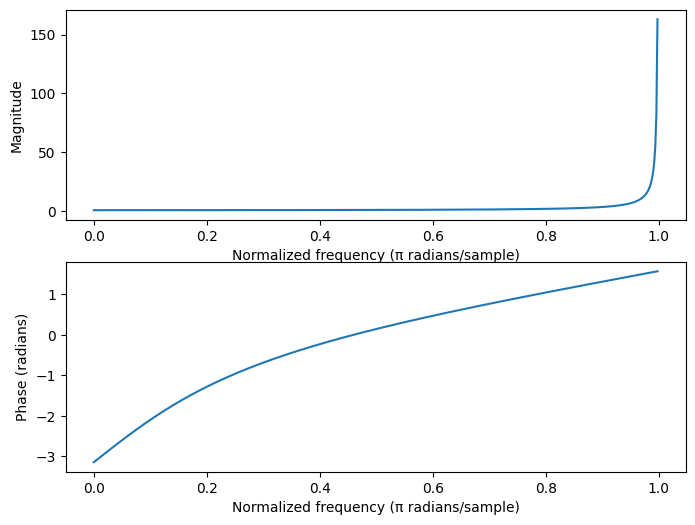

In [36]:
# y[n] - y[n-1] - 2y[n-2] = 2x[n] - x[n-1]  
# H(z) = Y(z) / X(z)=  (2z - 1) / (z^2 - z - 2)
# Y(z) and X(z) are the z-transforms of the output y[n] and input x[n]

# define the transfer function coefficients
b = [2, -1]
a = [1, -1, -2]

# compute the frequency response
w, h = freqz(b, a)

# plot the magnitude and phase responses
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(w/np.pi, np.abs(h))
ax[0].set_xlabel('Normalized frequency (π radians/sample)')
ax[0].set_ylabel('Magnitude')
ax[1].plot(w/np.pi, np.angle(h))
ax[1].set_xlabel('Normalized frequency (π radians/sample)')
ax[1].set_ylabel('Phase (radians)')
plt.show()